In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# param.txt を読み込んで key-value に変換
def load_param_file(filename):
    params = {}
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('#'):
                continue
            if '=' in line:
                key, value = line.split('=', 1)
                params[key.strip()] = value.strip()
    return params

params = load_param_file("param.txt")
dimension = int(params.get("dimension", 2))  # デフォルトで2次元

In [4]:
df = pd.read_csv("result.csv")
print(f"Loaded result.csv with {len(df)} rows")

Loaded result.csv with 10000 rows


In [1]:
# Maps field number to column name and label
def get_field_info(field_num):
    field_map = {
        1: ("alpha1", "Volume fraction of phase 1"),
        2: ("rho1", "Density of phase 1"),
        3: ("rho2", "Density of phase 2"),
        4: ("u", "Velocity x"),
        5: ("v", "Velocity y"),
        6: ("w", "Velocity z"),
        7: ("p", "Pressure"),
        8: ("rho", "Mixture density"),
        9: ("Y1", "Mass fraction of phase 1"),
        10: ("BVD_func", "BVD function")
    }
    return field_map.get(field_num, ("p", "Pressure"))  # default fallback


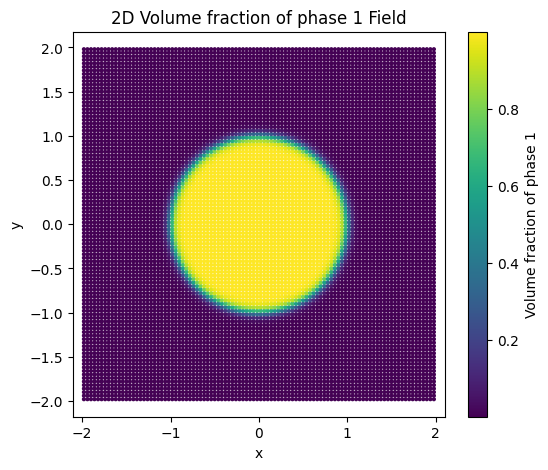

In [ ]:
# Select field number to visualize
field_num = 1

field_name, field_label = get_field_info(field_num)
if dimension == 1:
    plt.figure(figsize=(8, 4))
    plt.plot(df['x'], df[field_name], label=field_label)
    plt.xlabel('x')
    plt.ylabel(field_label)
    plt.title(f"1D {field_label} Distribution")
    plt.grid(True)
    plt.legend()
    plt.show()

elif dimension == 2:
    plt.figure(figsize=(6, 5))
    plt.scatter(df['x'], df['y'], c=df[field_name], cmap='viridis', s=3+field_num)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"2D {field_label} Field")
    plt.colorbar(label=field_label)
    plt.axis('equal')
    plt.show()

elif dimension == 3:
    print(f"3D visualization for '{field_label}' is not implemented yet.")
else:
    print(f"Unsupported dimension: {dimension}")
